In [ ]:
# Import OS module and Create folder base on user who use it
import os
import shutil
modelTrainingName = "Ponds-eFishery" #@param ["OCR-eFishery", "Ponds-eFishery"]
dirs = "/content/drive/MyDrive/TrainingModel/YOLOv8-Segmentation"
os.makedirs(dirs, exist_ok=True)

# Download YOLOv8 Ultralytics and install requirements
%pip install --upgrade clearml tensorboard ultralytics
%pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 25.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.2
    Uninstalling tensorboard-2.12.2:
      Successfully uninstalled tensorboard-2.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.13.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
from clearml import Task, Logger, browser_login
browser_login()
if modelTrainingName == "OCR-eFishery":
  task = Task.init(project_name='Take Home Test Model-eFishery', task_name='YOLOv8 Segmentation Training Model OCR', reuse_last_task_id=True)
elif modelTrainingName == "Ponds-eFishery":
  task = Task.init(project_name='Take Home Test Model-eFishery', task_name='YOLOv8 Segmentation Training Model Ponds', reuse_last_task_id=True)

<IPython.core.display.Javascript object>


🤖 ClearML connected successfully - let's build something! 🚀
ClearML Task: created new task id=4a425c33c12f494ba229351406470b4c
2023-05-12 04:14:32,325 - clearml.Task - INFO - Storing jupyter notebook directly as code


ClearML results page: https://app.clear.ml/projects/8e9052522ad44137a215e9722d9ce3d8/experiments/4a425c33c12f494ba229351406470b4c/output/log


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="tfPZGFqYT5wWafUYvt4s")
project = rf.workspace("take-home-test").project("ponds-segmen-model")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.


Dependency ultralytics<=8.0.20 is required but found version=8.0.98, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Ponds-Segmen-Model-2 in yolov8:: 100%|██████████| 31/31 [00:00<00:00, 239.17it/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512

2023-05-12 04:14:58,738 - clearml.model - INFO - Selected model id: bd7ddce6d97d451d91bf3d490ecc0f9c



                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512

2023-05-12 04:15:04,030 - clearml.model - INFO - Selected model id: 672efb4b63324e3bb8727c0bad2a74fa


Transferred 595/657 items from pretrained weights
Ultralytics YOLOv8.0.98 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.yaml, data=/content/Ponds-Segmen-Model-2/data.yaml, epochs=500, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=Ponds-eFishery, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, k

2023-05-12 04:32:40,444 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/Take%20Home%20Test%20Model-eFishery/YOLOv8%20Segmentation%20Training%20Model%20Ponds.4a425c33c12f494ba229351406470b4c/models/best.pt


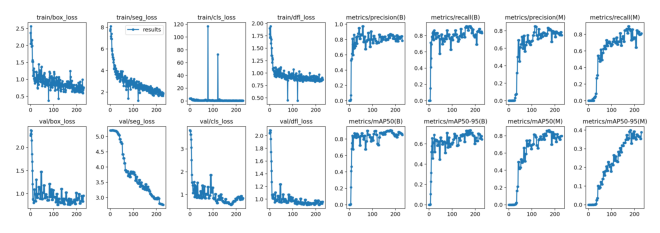

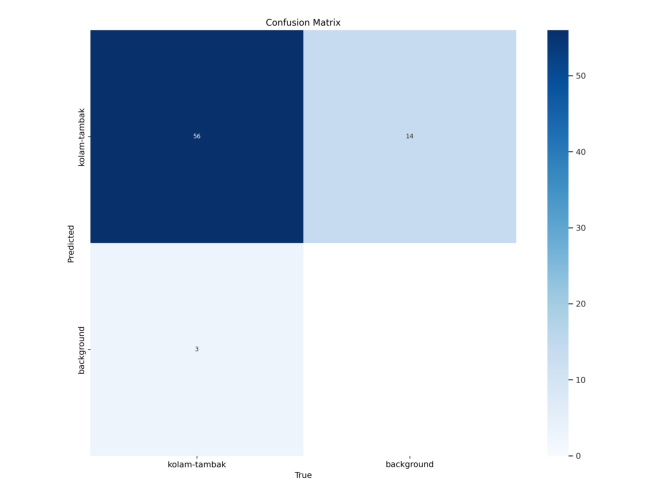

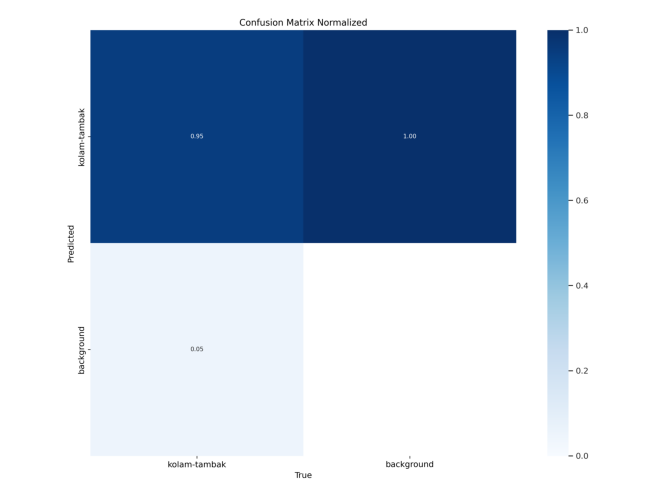

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8l-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8l-seg.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8l-seg.yaml').load('yolov8l.pt')  # build from YAML and transfer weights

# Train the model
model.train(data = os.path.join(dataset.location, "data.yaml"), epochs =500, 
            imgsz = 640, batch = 8, 
            device = 0, name = modelTrainingName)

In [ ]:
task.close()

Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
